## Linear Model for Cart Pole

In [1]:
import gym
import numpy as np
import seaborn as sns

In [2]:
env = gym.make('CartPole-v0')
reward_ls = []
param_ls = []
#env=gym.wrappers.monitor.Monitor(env, '/home/anthony/Documents/cart_pole/', force=True)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
for eps in range(100000):
    ob = env.reset()
    params = np.random.rand(4) *2 - 1
    param_ls.append(params)
    cum_rew = 0
    for i in range(200):
        ob, reward, done, meta = env.step(1 if np.sum(ob*params) > 0 else 0)
        cum_rew += reward
        #env.render()
        if done:
            break
    reward_ls.append(cum_rew)

/home/anthony/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


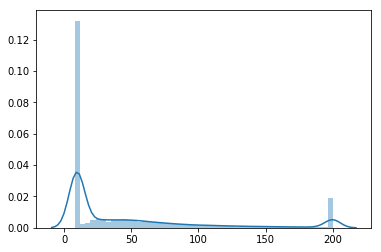

In [4]:
sns.distplot(reward_ls)

In [12]:
env.close()

In [10]:
opt_param=param_ls[np.where(np.array(reward_ls)==200)[0][0]]

array([-0.20999172,  0.47924075,  0.70843117,  0.54990345])

In [11]:
env=gym.wrappers.monitor.Monitor(env, '/home/anthony/Documents/cart_pole/', force=True)
opt_param=param_ls[np.where(np.array(reward_ls)==200)[0][0]]
ob = env.reset()
for i in range(200):
    ob, reward, done, meta = env.step(1 if np.sum(ob*opt_param) > 0 else 0)
    env.render()
    if done:
        break